In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)



![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Understanding

* key focus is to understand the data structure

* supporting each step by visual analytics

# John Hopkins data

In [2]:
data_path = ('../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
pd_raw = pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,989,989,989,1005,1005,1024,1024,1045,1045,1045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171


In [4]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '8/14/20', '8/15/20', '8/16/20', '8/17/20', '8/18/20', '8/19/20',
       '8/20/20', '8/21/20', '8/22/20', '8/23/20'],
      dtype='object', length=215)

In [5]:
time_idx = pd_raw.columns[4:]

In [6]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
pd_raw['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [8]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                               Belize


In [9]:
pd_raw[pd_raw['Country/Region']=='United Kingdom']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20
246,Anguilla,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
247,Bermuda,United Kingdom,32.307800,-64.750500,0,0,0,0,0,0,...,159,162,162,166,166,166,166,167,167,167
248,British Virgin Islands,United Kingdom,18.420700,-64.640000,0,0,0,0,0,0,...,9,9,9,9,11,11,11,21,21,21
249,Cayman Islands,United Kingdom,19.313300,-81.254600,0,0,0,0,0,0,...,203,203,203,203,203,205,205,205,205,205
250,Channel Islands,United Kingdom,49.372300,-2.364400,0,0,0,0,0,0,...,607,607,607,609,609,613,613,614,614,614
251,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
252,Gibraltar,United Kingdom,36.140800,-5.353600,0,0,0,0,0,0,...,206,209,215,217,222,223,229,231,239,246
253,Isle of Man,United Kingdom,54.236100,-4.548100,0,0,0,0,0,0,...,336,336,336,336,336,336,336,336,336,336
254,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
255,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,274,298,298,298,315,327,334,347,383,383


In [10]:
pd_raw[pd_raw['Country/Region']=='United Kingdom'].iloc[:,4::]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20
246,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
247,0,0,0,0,0,0,0,0,0,0,...,159,162,162,166,166,166,166,167,167,167
248,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,11,11,11,21,21,21
249,0,0,0,0,0,0,0,0,0,0,...,203,203,203,203,203,205,205,205,205,205
250,0,0,0,0,0,0,0,0,0,0,...,607,607,607,609,609,613,613,614,614,614
251,0,0,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
252,0,0,0,0,0,0,0,0,0,0,...,206,209,215,217,222,223,229,231,239,246
253,0,0,0,0,0,0,0,0,0,0,...,336,336,336,336,336,336,336,336,336,336
254,0,0,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
255,0,0,0,0,0,0,0,0,0,0,...,274,298,298,298,315,327,334,347,383,383


In [11]:
pd_raw[pd_raw['Country/Region']=='United Kingdom'].iloc[:,4::].sum(axis=0)

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
1/27/20         0
1/28/20         0
1/29/20         0
1/30/20         0
1/31/20         2
2/1/20          2
2/2/20          2
2/3/20          8
2/4/20          8
2/5/20          9
2/6/20          9
2/7/20          9
2/8/20         13
2/9/20         14
2/10/20        14
2/11/20        15
2/12/20        16
2/13/20        17
2/14/20        18
2/15/20        18
2/16/20        18
2/17/20        19
2/18/20        19
2/19/20        20
2/20/20        22
2/21/20        23
2/22/20        23
2/23/20        28
2/24/20        30
2/25/20        34
2/26/20        37
2/27/20        44
2/28/20        56
2/29/20        61
3/1/20         94
3/2/20        134
3/3/20        189
3/4/20        246
3/5/20        295
3/6/20        374
3/7/20        429
3/8/20        483
3/9/20        630
3/10/20       889
3/11/20      1301
3/12/20      1790
3/13/20      2270
3/14/20      2634
3/15/20      3077
3/16/20      3692
3/17/20   

In [12]:
country_list = ['Italy',
                'India',
                'Germany',
                'US',
                'Spain']

In [13]:
for each in country_list:
    df_plot[each] =np.array(pd_raw[pd_raw['Country/Region']== each].iloc[:,4::].sum(axis=0))

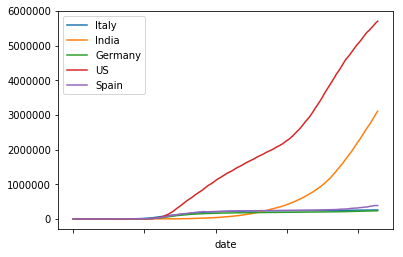

In [14]:
%matplotlib inline
df_plot.set_index('date').plot()

 ## Data Type date

In [191]:
# from datetime import datetime

In [15]:
df_plot.head()

,date,Italy,India,Germany,US,Spain
0,1/22/20,0,0,0,1,0
1,1/23/20,0,0,0,1,0
2,1/24/20,0,0,0,2,0
3,1/25/20,0,0,0,2,0
4,1/26/20,0,0,0,5,0


In [16]:
#df_plot.date[0]

In [17]:
#datetime.strptime(df_plot.date[0],'%m/%d/%y')

In [18]:
#time_idx = [datetime.strptime(each,'%m/%d/%y') for each in df_plot.date]  # convert to date time

In [19]:
#time_idx[0:5]


In [20]:
#time_str = [each.strftime('%Y-%m-%d')for each in time_idx]
#time_str[0:5]

### After Cleanup

In [21]:
df_plot.head()

,date,Italy,India,Germany,US,Spain
0,1/22/20,0,0,0,1,0
1,1/23/20,0,0,0,1,0
2,1/24/20,0,0,0,2,0
3,1/25/20,0,0,0,2,0
4,1/26/20,0,0,0,5,0


In [22]:
time_idx = [datetime.strptime(each,'%m/%d/%y') for each in df_plot.date]  # convert to date time
time_str = [each.strftime('%Y-%m-%d')for each in time_idx]  # converting back to ISo form as a string

In [23]:
df_plot['date']= time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
df_plot.head()

,date,Italy,India,Germany,US,Spain
0,2020-01-22,0,0,0,1,0
1,2020-01-23,0,0,0,1,0
2,2020-01-24,0,0,0,2,0
3,2020-01-25,0,0,0,2,0
4,2020-01-26,0,0,0,5,0


In [25]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';', index=False)

### Relational data model - defines a primary key

In [26]:
data_path = ('../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
pd_raw = pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,989,989,989,1005,1005,1024,1024,1045,1045,1045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171


In [27]:
## split transcational data(date in this exercise) and master data(lat and long information of countries)

In [28]:
pd_data_base=pd_raw.rename(columns = {'Country/Region': 'country',
                                      'Province/State' : 'state'}) # rename the columns in the data base
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing or it might resutlt as wrong state name for countries

In [29]:
pd_data_base =pd_data_base.drop(['Lat','Long'],axis=1)    # removing the lat and longitude in the data base
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999
1,no,Albania,0,0,0,0,0,0,0,0,...,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427
2,no,Algeria,0,0,0,0,0,0,0,0,...,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460
3,no,Andorra,0,0,0,0,0,0,0,0,...,989,989,989,1005,1005,1024,1024,1045,1045,1045
4,no,Angola,0,0,0,0,0,0,0,0,...,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171


In [30]:
#pd_data_base.set_index(['state','country'])   # setting index only to state and country column

In [31]:
#pd_data_base = pd_data_base.set_index(['state','country']).T     # transpose the matrix

In [32]:
#pd_data_base.head()

In [33]:
#pd_data_base.columns

In [34]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [35]:
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [36]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [37]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [38]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [39]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv ('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [40]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

            date state country  confirmed
56112 2020-08-19    no      US    5529824
56378 2020-08-20    no      US    5573847
56644 2020-08-21    no      US    5622540
56910 2020-08-22    no      US    5667112
57176 2020-08-23    no      US    5701679


# Groupby apply

In [89]:
pd_JH_data=pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
pd_JH_data=pd_JH_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0
1,2020-01-22,no,"Korea, South",1
2,2020-01-22,no,Kosovo,0
3,2020-01-22,no,Kuwait,0
4,2020-01-22,no,Kyrgyzstan,0


 # Test Data

In [90]:
test_data=pd_JH_data[((pd_JH_data['country']=='US')|
                      (pd_JH_data['country']=='Germany'))&
                     (pd_JH_data['date']>'2020-03-20')]

In [91]:
test_data.head()

,date,state,country,confirmed
15737,2020-03-21,no,Germany,22213
15777,2020-03-21,no,US,25825
16002,2020-03-22,no,Germany,24873
16043,2020-03-22,no,US,33761
16269,2020-03-23,no,Germany,29056


In [92]:
test_data.groupby(['country']).agg(np.max)

,date,state,confirmed
country,,,
Germany,2020-08-23,no,234494
US,2020-08-23,no,5701679


In [93]:
# %load ../src/features/build_features.py

import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
import pandas as pd

from scipy import signal


def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate

        Parameters:
        ----------
        in_array : pandas.series

        Returns:
        ----------
        Doubling rate: double
    '''

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope

if __name__ == '__main__':
    test_data_reg=np.array([2,4,6])
    result=get_doubling_time_via_regression(test_data_reg)
    print('the test slope is: '+str(result))

    

the test slope is: [2.]


In [94]:
#test_data.groupby(['state','country']).apply(get_doubling_time_via_regression)

In [95]:
def rolling_reg(df_input,col='confirmed'):
    ''' Rolling Regression to approximate the doubling time'

        Parameters:
        ----------
        df_input: pd.DataFrame
        col: str
            defines the used column
        Returns:
        ----------
        result: pd.DataFrame
    '''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)



    return result

In [96]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

state  country       
no     Germany  15737            NaN
                16002            NaN
                16269       7.417994
                16534       7.142035
                16801       8.012983
                17066       6.954407
                17333       6.501919
                17599       7.390371
                17864      10.136671
                18130      13.541893
                18397      13.781393
                18662      13.140681
                18928      12.037271
                19194      12.735506
                19460      16.052694
                19727      21.372453
                19993      27.427355
                20259      27.511936
                20525      21.792179
                20791      21.495848
                21057      26.565108
                21323      36.198404
                21588      43.982990
                21855      49.423444
                22121      74.043747
                22387      56.424411
                

In [97]:
pd_DR_result = pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index()

In [98]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed':'doubling_rate',
                             'level_2':'index'})

In [99]:
pd_DR_result.head()
#type(pd_DR_result)

,state,country,index,doubling_rate
0,Alberta,Canada,0,NaN
1,Alberta,Canada,465,NaN
2,Alberta,Canada,701,NaN
3,Alberta,Canada,998,NaN
4,Alberta,Canada,1231,NaN


In [100]:
pd_JH_data=pd_JH_data.reset_index()
pd_JH_data.head()

,index,date,state,country,confirmed
0,0,2020-01-22,Alberta,Canada,0
1,1,2020-01-22,no,"Korea, South",1
2,2,2020-01-22,no,Kosovo,0
3,3,2020-01-22,no,Kuwait,0
4,4,2020-01-22,no,Kyrgyzstan,0


In [101]:
pd_result_larg=pd.merge(pd_JH_data,pd_DR_result[['index','doubling_rate']],on=['index'],how='left')
pd_result_larg.head()

,index,date,state,country,confirmed,doubling_rate
0,0,2020-01-22,Alberta,Canada,0,NaN
1,1,2020-01-22,no,"Korea, South",1,NaN
2,2,2020-01-22,no,Kosovo,0,NaN
3,3,2020-01-22,no,Kuwait,0,NaN
4,4,2020-01-22,no,Kyrgyzstan,0,NaN


# Filtering the data with groupby apply

In [102]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function 
        it ensures that the data structure is kept'''
    window=5, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) # attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                           5, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result
        

In [103]:
pd_filtered_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [104]:
pd_filtered_result.head()

,index,state,country,confirmed,confirmed_filtered
0,0,Alberta,Canada,0,0.0
1,1,no,"Korea, South",1,0.8
2,2,no,Kosovo,0,0.0
3,3,no,Kuwait,0,0.0
4,4,no,Kyrgyzstan,0,0.0


In [105]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_result_larg.head()

,index,date,state,country,confirmed,doubling_rate,confirmed_filtered
0,0,2020-01-22,Alberta,Canada,0,NaN,0.0
1,1,2020-01-22,no,"Korea, South",1,NaN,0.8
2,2,2020-01-22,no,Kosovo,0,NaN,0.0
3,3,2020-01-22,no,Kuwait,0,NaN,0.0
4,4,2020-01-22,no,Kyrgyzstan,0,NaN,0.0


# Filtered doubing rate

In [106]:

pd_filtered_doubling=pd_result_larg[['state','country','confirmed_filtered']].groupby(['state','country']).apply(rolling_reg,'confirmed_filtered').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_filtered':'doubling_rate_filtered',
                             'level_2':'index'})



In [107]:
pd_filtered_doubling.head()

,state,country,index,doubling_rate_filtered
0,Alberta,Canada,0,NaN
1,Alberta,Canada,465,NaN
2,Alberta,Canada,701,NaN
3,Alberta,Canada,998,NaN
4,Alberta,Canada,1231,NaN


In [108]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_doubling[['index','doubling_rate_filtered']],on=['index'],how='left')
pd_result_larg.head()

,index,date,state,country,confirmed,doubling_rate,confirmed_filtered,doubling_rate_filtered
0,0,2020-01-22,Alberta,Canada,0,NaN,0.0,NaN
1,1,2020-01-22,no,"Korea, South",1,NaN,0.8,NaN
2,2,2020-01-22,no,Kosovo,0,NaN,0.0,NaN
3,3,2020-01-22,no,Kuwait,0,NaN,0.0,NaN
4,4,2020-01-22,no,Kyrgyzstan,0,NaN,0.0,NaN


In [109]:
mask=pd_result_larg['confirmed']>100  # to make sure that lesser doubling rate values in earlier days mask is vector
pd_result_larg['doubling_rate_filtered']=pd_result_larg['doubling_rate_filtered'].where(mask, other=np.NaN) 

In [110]:
pd_result_larg.head()

,index,date,state,country,confirmed,doubling_rate,confirmed_filtered,doubling_rate_filtered
0,0,2020-01-22,Alberta,Canada,0,NaN,0.0,NaN
1,1,2020-01-22,no,"Korea, South",1,NaN,0.8,NaN
2,2,2020-01-22,no,Kosovo,0,NaN,0.0,NaN
3,3,2020-01-22,no,Kuwait,0,NaN,0.0,NaN
4,4,2020-01-22,no,Kyrgyzstan,0,NaN,0.0,NaN


In [112]:
pd_result_larg.to_csv('../data/processed/COVID_final_set.csv',sep=';',index=False)